# Ricky Doucette

## Research questions

### 1. Does the average change in a top NHL player's offensive stats from one season to the next have a negative correlation with their defensive stats? 
### 2. Does an increase in time on ice per game for a succesive season significantly increase an NHL player's overall statistics in that following season?


In [318]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
# clean2017 = pd.read_csv('../data/processed/clean2017.csv')
# clean2018 = pd.read_csv('../data/processed/clean2018.csv')



In [319]:
# clean2017['Year'] = 2017
# clean2018['Year'] = 2018

# bothYears = pd.concat([clean2017,clean2018], ignore_index = True)
# bothYears = bothYears.sort_values(by=['Name'],ignore_index = True)
# bothYears
import sys
sys.path.append('..')

from analysis.code import project_functions1
bothYears = project_functions1.load_and_process('../data/processed/clean2017.csv','../data/processed/clean2018.csv')
bothYears
bothYears.to_csv('../data/processed/bothYears.csv')

In [320]:
bothYears.shape

(450, 20)

In [321]:
bothYears.head()

,Rk,Name,GP,G,A,P,PIM,+/-,TOI,PPG,GWG,PPP,G/GP,A/GP,P/GP,SHOTS,HITS,BS,Year,SH%
0,185,Aaron Ekblad,82,16,22,38,71,9,23.37,5,4,11,0.195,0.268,0.463,189,69,121,2017,0.085
1,193,Aaron Ekblad,82,13,24,37,47,1,23.63,5,1,10,0.159,0.293,0.451,180,114,88,2018,0.072
2,115,Adam Henrique,81,24,26,50,20,11,17.77,6,8,13,0.296,0.321,0.617,151,61,61,2017,0.159
3,155,Adam Henrique,82,18,24,42,24,-5,16.45,8,3,13,0.220,0.293,0.512,122,78,71,2018,0.148
4,193,Adrian Kempe,81,16,21,37,49,11,13.32,1,3,5,0.198,0.259,0.457,119,91,18,2017,0.135


In [322]:
bothYears.columns

Index(['Rk', 'Name', 'GP', 'G', 'A', 'P', 'PIM', '+/-', 'TOI', 'PPG', 'GWG',
       'PPP', 'G/GP', 'A/GP', 'P/GP', 'SHOTS', 'HITS', 'BS', 'Year', 'SH%'],
      dtype='object')

In [323]:

legend ={
    "Name": "Player's Name",
    "Rk" : "Rank In List Accoring to Point Total",
    "GP" : "Games Played",
    "G" : "Goals Scored" ,
    "A" :"Assists",
    "P": "Points",
    "Pim": "Penalty Minutes",
    "+/-": "Plus Minus",
    "TOI" : "Average Time on Ice Per Game",
    "PPG": "Power-Play Goals",
    "GWG" : "Game-Winning Goals",
    "PPP" : "Power-Play Points",
    "G/GP": "Goals Per Game Played",
    "A/GP": "Assists Per Game Played",
    "P/GP" : "Points Per Game Played",
    "SHOTS": "Shots On Goal",
    "SH%": "Percentage of Shots Taken That Were Goals",
    "HITS": "Hits",
    "BS": "Blocked Shots",
    "Year": "Year the Data is For"
}
legend

{'Name': "Player's Name",
 'Rk': 'Rank In List Accoring to Point Total',
 'GP': 'Games Played',
 'G': 'Goals Scored',
 'A': 'Assists',
 'P': 'Points',
 'Pim': 'Penalty Minutes',
 '+/-': 'Plus Minus',
 'TOI': 'Average Time on Ice Per Game',
 'PPG': 'Power-Play Goals',
 'GWG': 'Game-Winning Goals',
 'PPP': 'Power-Play Points',
 'G/GP': 'Goals Per Game Played',
 'A/GP': 'Assists Per Game Played',
 'P/GP': 'Points Per Game Played',
 'SHOTS': 'Shots On Goal',
 'SH%': 'Percentage of Shots Taken That Were Goals',
 'HITS': 'Hits',
 'BS': 'Blocked Shots',
 'Year': 'Year the Data is For'}

In [324]:
bothYears.describe()

,Rk,GP,G,A,P,PIM,+/-,TOI,PPG,GWG,PPP,G/GP,A/GP,P/GP,SHOTS,HITS,BS,Year,SH%
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,127.480000,75.926667,20.286667,32.664444,52.951111,33.660000,1.966667,18.660133,5.128889,3.277778,14.948889,0.266502,0.430836,0.697316,180.766667,72.726667,51.671111,2017.500000,0.111529
std,82.544694,8.225738,9.713493,13.402982,19.153635,20.569453,14.265733,3.031010,3.967160,2.123303,8.876262,0.122731,0.168214,0.234640,53.078848,43.519071,35.266574,0.500556,0.040673
min,1.000000,33.000000,2.000000,9.000000,23.000000,2.000000,-42.000000,12.220000,0.000000,0.000000,0.000000,0.027000,0.113000,0.309000,62.000000,5.000000,7.000000,2017.000000,0.018000
25%,57.000000,73.000000,13.000000,23.000000,37.000000,20.000000,-7.000000,16.472500,2.000000,2.000000,8.000000,0.179000,0.301000,0.512000,141.000000,40.000000,27.000000,2017.000000,0.082250
50%,119.500000,79.000000,19.000000,29.000000,48.000000,29.500000,1.500000,18.280000,4.000000,3.000000,13.000000,0.248500,0.398500,0.646000,180.000000,61.000000,40.000000,2017.500000,0.112000
75%,188.750000,82.000000,27.000000,41.000000,64.750000,44.000000,11.000000,20.345000,7.000000,4.000000,20.000000,0.345750,0.535500,0.848250,212.750000,96.000000,62.750000,2018.000000,0.139750
max,347.000000,83.000000,51.000000,87.000000,128.000000,187.000000,49.000000,26.820000,20.000000,12.000000,48.000000,0.630000,1.061000,1.561000,365.000000,250.000000,203.000000,2018.000000,0.235000


In [325]:
bothYears.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      450 non-null    int64  
 1   Name    450 non-null    object 
 2   GP      450 non-null    int64  
 3   G       450 non-null    int64  
 4   A       450 non-null    int64  
 5   P       450 non-null    int64  
 6   PIM     450 non-null    int64  
 7   +/-     450 non-null    int64  
 8   TOI     450 non-null    float64
 9   PPG     450 non-null    int64  
 10  GWG     450 non-null    int64  
 11  PPP     450 non-null    int64  
 12  G/GP    450 non-null    float64
 13  A/GP    450 non-null    float64
 14  P/GP    450 non-null    float64
 15  SHOTS   450 non-null    int64  
 16  HITS    450 non-null    int64  
 17  BS      450 non-null    int64  
 18  Year    450 non-null    int64  
 19  SH%     450 non-null    float64
dtypes: float64(5), int64(14), object(1)
memory usage: 70.4+ KB


In [326]:
from datetime import datetime, timedelta

In [327]:
# TIME = []
# for toi in bothYears["TOI"]:
#     time = (datetime.strptime(toi, "%M:%S"))
#     TIME.append(round(time.minute + time.second/60,2))
    
# bothYears['TOI'] = TIME
# bothYears

In [328]:
moreIce = []
lessIce = []
i =0 
while i < len(bothYears)-1:
    if bothYears['TOI'][i+1] > bothYears['TOI'][i]:
        moreIce.append(i+1) 
        #players who got more TOI in 2018 than 2017 from dataset
    else:
        lessIce.append(i+1) 
        #players who got less TOI in 2018 than 2017 from dataset
    i = i+2
    

Text(0, 0.41, 'y = -0.0290 + 0.0618x')

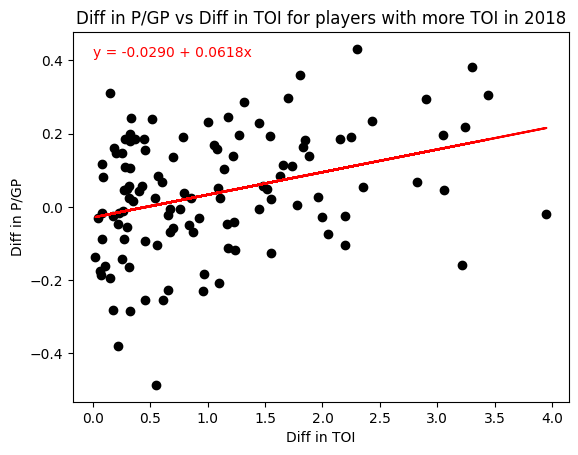

In [329]:
prevYear = [x - 1 for x in moreIce]
x = bothYears['TOI'][moreIce].reset_index(drop=True) - bothYears['TOI'][prevYear].reset_index(drop=True)
y = bothYears['P/GP'][moreIce].reset_index(drop=True) - bothYears['P/GP'][prevYear].reset_index(drop=True)

a, b = np.polyfit(x,y, 1)
plt.scatter(x,y, color = 'black')
plt.plot(x, a*x +b, color='red') 
plt.title("Diff in P/GP vs Diff in TOI for players with more TOI in 2018")
plt.ylabel("Diff in P/GP")
plt.xlabel("Diff in TOI")

plt.text(0, 0.41, 'y = ' + '{:.4f}'.format(b) + ' + {:.4f}'.format(a) + 'x', size=10, color = 'red')

This graph shows that it does seem like the players with more TOI in 2018 compared to 2017 in our dataset tend to to have more points per game played on average.

In [330]:
TOIvsP = pd.DataFrame()

TOIvsP['Diff in TOI'] = x
TOIvsP['Diff in P/GP'] = y

TOIvsP

TOIvsP.to_csv('../data/processed/TOIvsP.csv')

Text(0.5, 1.0, 'Correlation of the Difference in TOI and P/GP for 2017 and 2018')

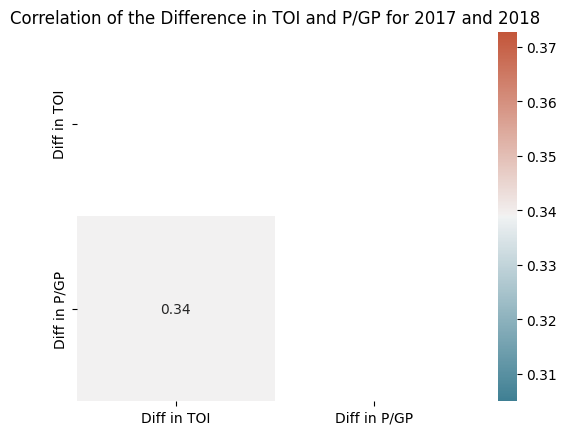

In [331]:
TOIvsPcorr = TOIvsP.corr()
matrix = np.triu(TOIvsPcorr)
sns.heatmap(TOIvsPcorr, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True), mask =matrix)
plt.title("Correlation of the Difference in TOI and P/GP for 2017 and 2018")

A correlation of 0.34 would be considered a moderate corelation. 
This confirms that players who did receive more icetime in 2018 tended to get more points per game than what they did in 2017

In [332]:
# c = []
# for i in bothYears.index:
#     c.append(round(float(bothYears['SH%'][i][:-1])/100,4))
# bothYears['SH%'] = c
# bothYears

#Here we converting SH% from a percentage to a decimal to use in future calculations

In [333]:
#Turning the TOI into total time on ice for all the games they played and dropping 
#unnessary columns or ones that are obviously correlated with many other variables
temp = bothYears.copy()
temp['TotIce']= temp['TOI']*temp['GP']
temp = temp.drop(temp.columns[[0,2,8,9,10,11,12,13,14]], axis=1)
temp


,Name,G,A,P,PIM,+/-,SHOTS,HITS,BS,Year,SH%,TotIce
0,Aaron Ekblad,16,22,38,71,9,189,69,121,2017,0.085,1916.34
1,Aaron Ekblad,13,24,37,47,1,180,114,88,2018,0.072,1937.66
2,Adam Henrique,24,26,50,20,11,151,61,61,2017,0.159,1439.37
3,Adam Henrique,18,24,42,24,-5,122,78,71,2018,0.148,1348.90
4,Adrian Kempe,16,21,37,49,11,119,91,18,2017,0.135,1078.92
...,...,...,...,...,...,...,...,...,...,...,...,...
445,Yanni Gourde,25,39,64,50,34,136,57,42,2017,0.184,1324.30
446,Zach Hyman,21,20,41,65,16,144,102,39,2018,0.146,1226.17
447,Zach Hyman,15,25,40,37,22,148,117,55,2017,0.101,1422.70
448,Zachary Werenski,16,21,37,16,8,207,58,92,2017,0.077,1737.89


In [334]:
temp2017 = temp[temp['Year']==2017].drop(['Year','Name'], axis=1)
temp2018 = temp[temp['Year']==2018].drop(['Year','Name'], axis=1)

In [335]:
temp2017

,G,A,P,PIM,+/-,SHOTS,HITS,BS,SH%,TotIce
0,16,22,38,71,9,189,69,121,0.085,1916.34
2,24,26,50,20,11,151,61,61,0.159,1439.37
4,16,21,37,49,11,119,91,18,0.135,1078.92
6,27,51,78,14,9,256,30,67,0.106,1743.53
8,28,24,52,6,6,181,40,25,0.155,1213.60
...,...,...,...,...,...,...,...,...,...,...
441,43,35,78,12,49,184,48,45,0.234,1535.04
443,20,41,61,10,20,184,21,18,0.109,1367.76
445,25,39,64,50,34,136,57,42,0.184,1324.30
447,15,25,40,37,22,148,117,55,0.101,1422.70


Text(0.5, 1.0, 'Correlation of Significant NHL Stats in 2017')

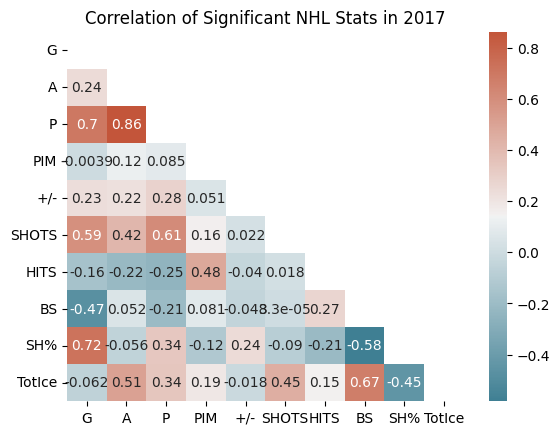

In [336]:
corr2017 = temp2017.corr()
mask2017 = np.triu(corr2017)
sns.heatmap(corr2017, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True), mask = mask2017)
plt.title("Correlation of Significant NHL Stats in 2017")

Text(0.5, 1.0, 'Correlation of Significant NHL Stats in 2018')

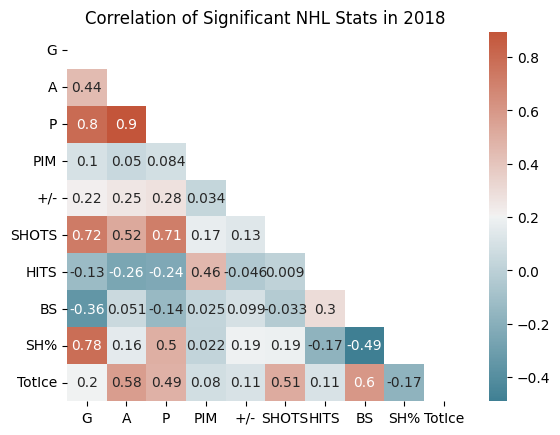

In [337]:
corr2018 = temp2018.corr()
mask2018 = np.triu(corr2018)
sns.heatmap(corr2018, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True), mask = mask2018)
plt.title("Correlation of Significant NHL Stats in 2018")

This shows the correlation between the variables that I deemed more important and not as obviously correlated to many other variables such as games played. There are a few obvious correlations such as points with assists and points with goals. If you were informed on hockey, there are some correlations that would be expected as well that we see such as goals with shooting percentage and shots, shots with points, hits with penalty minutes, and TotIce with shots.
What surprises me is that TotIce isn't as correlated with as many other variables as I would have expected but that makes sense when you think about the different game styles of players. For example, if one player was 5'8 and rarely hit, if you doubled his ice time, it probably wouldn't make him start hitting signficantly more or less. Another thing I also find interesting is how much more significantly TotIce is correlated with points in 2018 compared to in 2017. 

In [338]:
bothYearsByCol = temp[temp['Year']==2017].add_suffix('_2017').reset_index(drop=True).join(temp[temp['Year']==2018].add_suffix('_2018').reset_index(drop=True))
bothYearsByCol = bothYearsByCol.drop(['Name_2018','Year_2017', 'Year_2018'], axis =1)
bothYearsByCol = bothYearsByCol.rename(columns={"Name_2017": "Name"})
bothYearsByCol

,Name,G_2017,A_2017,P_2017,PIM_2017,+/-_2017,SHOTS_2017,HITS_2017,BS_2017,SH%_2017,...,G_2018,A_2018,P_2018,PIM_2018,+/-_2018,SHOTS_2018,HITS_2018,BS_2018,SH%_2018,TotIce_2018
0,Aaron Ekblad,16,22,38,71,9,189,69,121,0.085,...,13,24,37,47,1,180,114,88,0.072,1937.66
1,Adam Henrique,24,26,50,20,11,151,61,61,0.159,...,18,24,42,24,-5,122,78,71,0.148,1348.90
2,Adrian Kempe,16,21,37,49,11,119,91,18,0.135,...,12,16,28,50,-10,118,86,21,0.102,1174.50
3,Aleksander Barkov,27,51,78,14,9,256,30,67,0.106,...,35,61,96,8,-3,206,28,61,0.170,1832.70
4,Alex DeBrincat,28,24,52,6,6,181,40,25,0.155,...,41,35,76,15,0,220,35,26,0.186,1451.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,William Karlsson,43,35,78,12,49,184,48,45,0.234,...,24,32,56,16,1,169,51,55,0.142,1544.06
221,William Nylander,20,41,61,10,20,184,21,18,0.109,...,7,20,27,16,-4,130,16,14,0.054,837.00
222,Yanni Gourde,25,39,64,50,34,136,57,42,0.184,...,22,26,48,66,9,130,83,30,0.169,1266.40
223,Zach Hyman,15,25,40,37,22,148,117,55,0.101,...,21,20,41,65,16,144,102,39,0.146,1226.17


In [339]:
off = pd.DataFrame().assign(
    G_2017=bothYearsByCol['G_2017'], A_2017=bothYearsByCol['A_2017'], 
    P_2017=bothYearsByCol['P_2017'], TotIce_2017=bothYearsByCol['TotIce_2017'],
    G_2018=bothYearsByCol['G_2018'], A_2018=bothYearsByCol['A_2018'], 
    P_2018=bothYearsByCol['P_2018'], TotIce_2018=bothYearsByCol['TotIce_2018'])
off

,G_2017,A_2017,P_2017,TotIce_2017,G_2018,A_2018,P_2018,TotIce_2018
0,16,22,38,1916.34,13,24,37,1937.66
1,24,26,50,1439.37,18,24,42,1348.90
2,16,21,37,1078.92,12,16,28,1174.50
3,27,51,78,1743.53,35,61,96,1832.70
4,28,24,52,1213.60,41,35,76,1451.40
...,...,...,...,...,...,...,...,...
220,43,35,78,1535.04,24,32,56,1544.06
221,20,41,61,1367.76,7,20,27,837.00
222,25,39,64,1324.30,22,26,48,1266.40
223,15,25,40,1422.70,21,20,41,1226.17


In [340]:
off.to_csv('../data/processed/offense.csv')

In [341]:
defense = bothYearsByCol.copy()
defense = defense.drop(defense.columns[[0,1,2,3,6,9,11,12,13,16,19]], axis =1)
defense

,PIM_2017,+/-_2017,HITS_2017,BS_2017,TotIce_2017,PIM_2018,+/-_2018,HITS_2018,BS_2018,TotIce_2018
0,71,9,69,121,1916.34,47,1,114,88,1937.66
1,20,11,61,61,1439.37,24,-5,78,71,1348.90
2,49,11,91,18,1078.92,50,-10,86,21,1174.50
3,14,9,30,67,1743.53,8,-3,28,61,1832.70
4,6,6,40,25,1213.60,15,0,35,26,1451.40
...,...,...,...,...,...,...,...,...,...,...
220,12,49,48,45,1535.04,16,1,51,55,1544.06
221,10,20,21,18,1367.76,16,-4,16,14,837.00
222,50,34,57,42,1324.30,66,9,83,30,1266.40
223,37,22,117,55,1422.70,65,16,102,39,1226.17


In [342]:
defense.to_csv('../data/processed/defense.csv')

Text(50.722222222222214, 0.5, '2018')

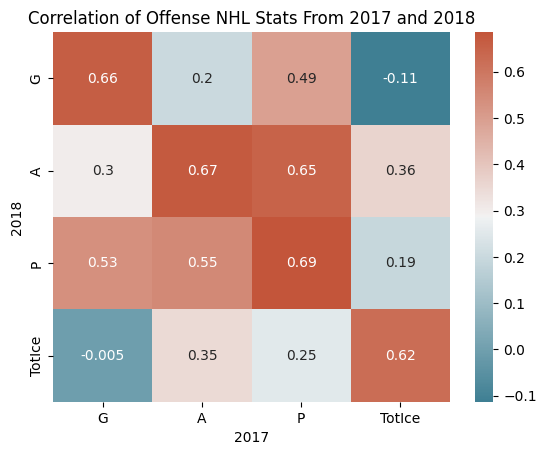

In [343]:
Olabels = ['G', 'A', 'P', 'TotIce']
oCorr = off.corr()
# drop rows
oCorr.drop(['G_2017','A_2017','P_2017','TotIce_2017'], inplace=True)
# drop cols
oCorr.drop(['G_2018','A_2018','P_2018','TotIce_2018'], axis=1, inplace=True)
# maskO = np.triu(oCorr)
sns.heatmap(oCorr, annot=True, xticklabels = Olabels, yticklabels = Olabels, cmap=sns.diverging_palette(220, 20, as_cmap=True))

plt.title("Correlation of Offense NHL Stats From 2017 and 2018")
plt.xlabel("2017")
plt.ylabel("2018")

This correlation plot I found to be very interesting. All of the offensive variables from the 2017 dataset are correlated with the same variable from the 2018 dataset in a range of 0.62 to 0.69! (data on main diagonal)

Text(50.722222222222214, 0.5, '2018')

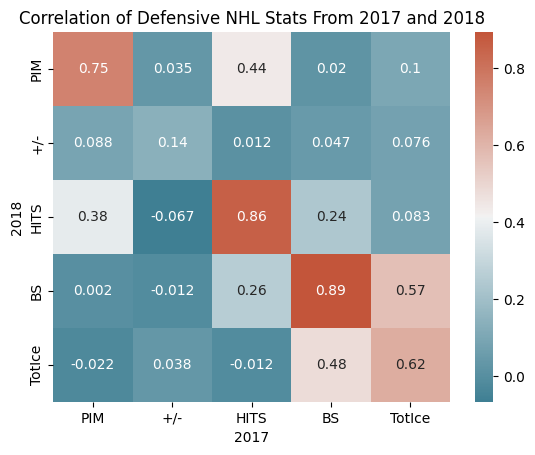

In [344]:
Dlabels = ['PIM','+/-','HITS', 'BS', 'TotIce']
dCorr = defense.corr()
# drop rows
dCorr.drop(['PIM_2017','+/-_2017','HITS_2017','BS_2017','TotIce_2017'], inplace=True)
# drop cols
dCorr.drop(['PIM_2018','+/-_2018','HITS_2018','BS_2018','TotIce_2018'], axis=1, inplace=True)
sns.heatmap(dCorr, xticklabels= Dlabels ,  yticklabels= Dlabels, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

plt.title("Correlation of Defensive NHL Stats From 2017 and 2018")
plt.xlabel("2017")
plt.ylabel("2018")

This too is very interesting. From the different seasons, blocked shots, penalty minutes, and hits are very correlated. TOI is pretty correlated as well. The plus minus however is not correlated whatsoever between seasons.

In [345]:
oVSdef = pd.DataFrame()

oVSdef['G_Diff'] = bothYearsByCol.iloc[:,11] - bothYearsByCol.iloc[:,1]
oVSdef['A_Diff']= bothYearsByCol.iloc[:,12] - bothYearsByCol.iloc[:,2]
oVSdef['P_Diff']= bothYearsByCol.iloc[:,13] - bothYearsByCol.iloc[:,3]

oVSdef['PIM_Diff'] = bothYearsByCol.iloc[:,14] - bothYearsByCol.iloc[:,4]
oVSdef['HITS_Diff'] = bothYearsByCol.iloc[:,17] - bothYearsByCol.iloc[:,7]
oVSdef['+/-_Diff'] = bothYearsByCol.iloc[:,15] - bothYearsByCol.iloc[:,5]
oVSdef['BS_Diff'] = bothYearsByCol.iloc[:,18] - bothYearsByCol.iloc[:,8]

oVSdef


,G_Diff,A_Diff,P_Diff,PIM_Diff,HITS_Diff,+/-_Diff,BS_Diff
0,-3,2,-1,-24,45,-8,-33
1,-6,-2,-8,4,17,-16,10
2,-4,-5,-9,1,-5,-21,3
3,8,10,18,-6,-2,-12,-6
4,13,11,24,9,-5,-6,1
...,...,...,...,...,...,...,...
220,-19,-3,-22,4,3,-48,10
221,-13,-21,-34,6,-5,-24,-4
222,-3,-13,-16,16,26,-25,-12
223,6,-5,1,28,-15,-6,-16


In [346]:
oVSdef.to_csv('../data/processed/offVSdef.csv')

Text(0.5, 1.0, 'Correlation of the Difference between 2017 and 2018 for Offensive and Defensive Stats')

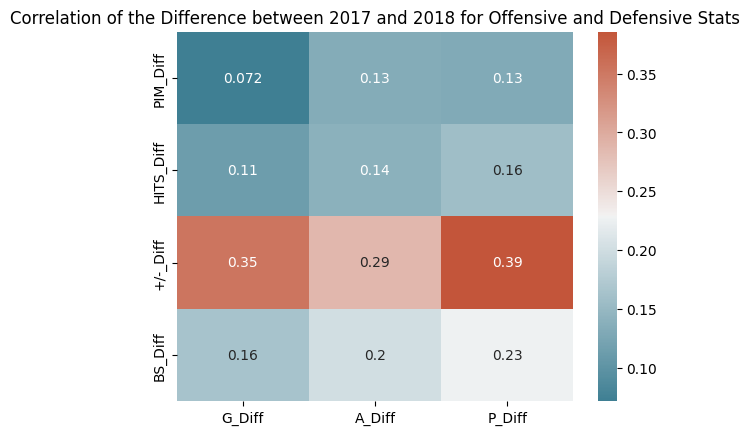

In [347]:
oVSdefCorr = oVSdef.corr()
# drop rows
oVSdefCorr.drop(['G_Diff','A_Diff', 'P_Diff'], inplace=True)
# drop cols
oVSdefCorr.drop(['PIM_Diff','HITS_Diff', '+/-_Diff', 'BS_Diff'], axis=1, inplace=True)
sns.heatmap(oVSdefCorr, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

plt.title("Correlation of the Difference between 2017 and 2018 for Offensive and Defensive Stats")

This answers one of our research questions and shows us that there does not tend to be much correlation between one seasons offensive stats and the next's defensive stats. 
The defensive stat whose differene between seasons had the most correlation with the difference between seasons for offensive stats was the +/- which makes sense intuitively since gaining more points increases your +/-.

Text(0, 0.41, 'y = -0.0290 + 0.0618x')

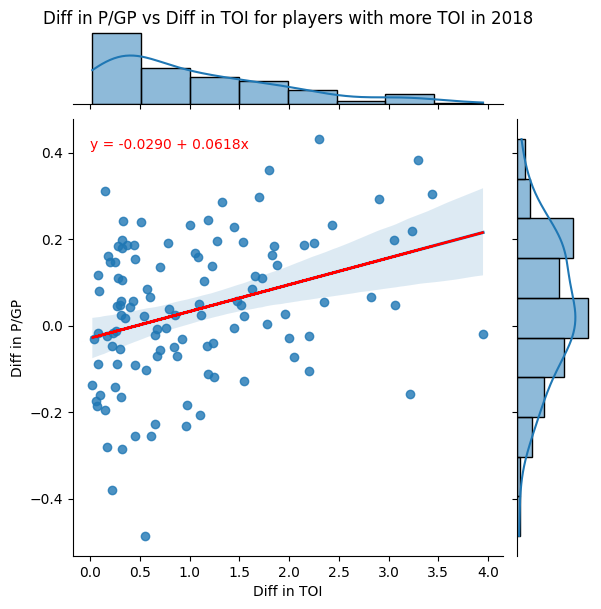

In [348]:
x = bothYears['TOI'][moreIce].reset_index(drop=True) - bothYears['TOI'][prevYear].reset_index(drop=True)
y = bothYears['P/GP'][moreIce].reset_index(drop=True) - bothYears['P/GP'][prevYear].reset_index(drop=True)
sns.jointplot(x =x, y =y, kind='reg')

plt.title("Diff in P/GP vs Diff in TOI for players with more TOI in 2018", y = 1.2)
plt.ylabel("Diff in P/GP")
plt.xlabel("Diff in TOI")
plt.plot(x, a*x +b, color='red') 
plt.text(0, 0.41, 'y = ' + '{:.4f}'.format(b) + ' + {:.4f}'.format(a) + 'x', size=10, color = 'red')

In [349]:
TOIvsStats = pd.DataFrame()

TOIvsStats['TOI_Diff'] = bothYears['TOI'][moreIce].reset_index(drop=True) - bothYears['TOI'][prevYear].reset_index(drop=True)
TOIvsStats['P/GP_Diff'] = bothYears['P/GP'][moreIce].reset_index(drop=True) - bothYears['P/GP'][prevYear].reset_index(drop=True)
TOIvsStats['A/GP_Diff'] = bothYears['A/GP'][moreIce].reset_index(drop=True) - bothYears['A/GP'][prevYear].reset_index(drop=True)
TOIvsStats['G/GP_Diff'] = bothYears['G/GP'][moreIce].reset_index(drop=True) - bothYears['G/GP'][prevYear].reset_index(drop=True)

TOIvsStats['HITS/GP_Diff'] = (bothYears['HITS'][moreIce]/bothYears['GP'][moreIce]).reset_index(drop=True) - (bothYears['HITS'][prevYear]/bothYears['GP'][prevYear]).reset_index(drop=True)
TOIvsStats['PIM/GP_Diff'] = (bothYears['PIM'][moreIce]/bothYears['GP'][moreIce]).reset_index(drop=True) - (bothYears['PIM'][prevYear]/bothYears['GP'][prevYear]).reset_index(drop=True)
TOIvsStats['BS/GP_Diff'] = (bothYears['BS'][moreIce]/bothYears['GP'][moreIce]).reset_index(drop=True) - (bothYears['HITS'][prevYear]/bothYears['GP'][prevYear]).reset_index(drop=True)
TOIvsStats['+/-_Diff'] = bothYears['+/-'][moreIce].reset_index(drop=True) - bothYears['+/-'][prevYear].reset_index(drop=True)
TOIvsStats


,TOI_Diff,P/GP_Diff,A/GP_Diff,G/GP_Diff,HITS/GP_Diff,PIM/GP_Diff,BS/GP_Diff,+/-_Diff
0,0.26,-0.012,0.025,-0.036,0.548780,-0.292683,0.231707,-8
1,1.18,-0.111,-0.061,-0.050,-0.061728,0.012346,-0.864198,-21
2,0.28,0.184,0.098,0.085,-0.038283,-0.079654,0.364156,-12
3,2.90,0.293,0.134,0.159,-0.060976,0.109756,-0.170732,-6
4,1.63,0.085,0.122,-0.037,-0.073171,0.000000,-0.768293,0
...,...,...,...,...,...,...,...,...
110,3.22,-0.158,-0.148,-0.011,0.227920,0.132004,0.689459,-18
111,1.18,0.244,0.130,0.114,-0.040199,-0.174345,-0.076784,24
112,0.32,0.180,0.151,0.030,-0.342378,-0.215244,-0.525305,25
113,0.08,-0.089,0.023,-0.113,-0.009790,-0.464273,-0.765888,6


In [355]:
TOIvsStats.to_csv('../data/processed/TOIvsStats.csv')

Text(200, -50, 'y = -1.2011 + 0.0423x')

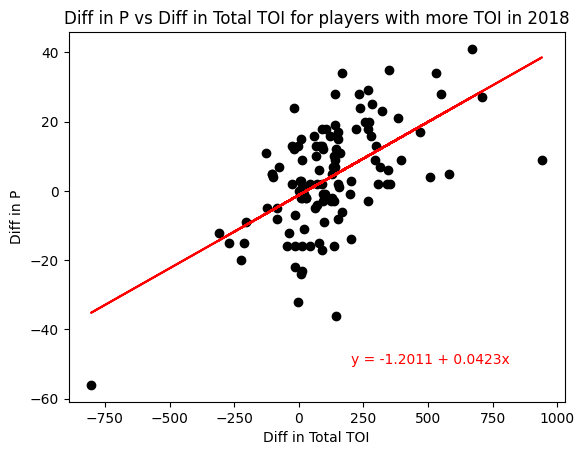

In [350]:
x2 = (bothYears['TOI'][moreIce]*bothYears['GP'][moreIce]).reset_index(drop=True) - (bothYears['TOI'][prevYear]*bothYears['GP'][prevYear]).reset_index(drop=True)
y2 = bothYears['P'][moreIce].reset_index(drop=True) - bothYears['P'][prevYear].reset_index(drop=True)

c, d = np.polyfit(x2,y2, 1)
plt.scatter(x2,y2, color = 'black')
plt.plot(x2, c*x2 +d, color='red') 
plt.title("Diff in P vs Diff in Total TOI for players with more TOI in 2018")
plt.ylabel("Diff in P")
plt.xlabel("Diff in Total TOI")

plt.text(200, -50, 'y = ' + '{:.4f}'.format(d) + ' + {:.4f}'.format(c) + 'x', size=10, color = 'red')


Text(200, -50, 'y = -1.2011 + 0.0423x')

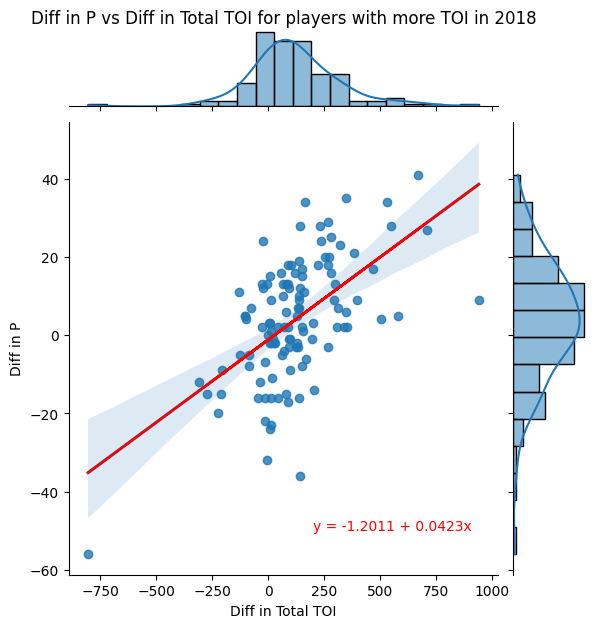

In [351]:
sns.jointplot(x =x2, y =y2, kind='reg')
plt.plot(x2, c*x2 +d, color='red') 
plt.title("Diff in P vs Diff in Total TOI for players with more TOI in 2018", y = 1.2)
plt.ylabel("Diff in P")
plt.xlabel("Diff in Total TOI")
plt.text(200, -50, 'y = ' + '{:.4f}'.format(d) + ' + {:.4f}'.format(c) + 'x', size=10, color = 'red')

In [352]:
for i in (x).index:
    if y[i]>0:
        y[i] = "Increase"
    else:
        y[i] = "Decrease"
y

0      Decrease
1      Decrease
2      Increase
3      Increase
4      Increase
         ...   
110    Decrease
111    Increase
112    Increase
113    Decrease
114    Increase
Name: P/GP, Length: 115, dtype: object

In [353]:
ChangeInPperGP=y.to_frame()
ChangeInPperGP.to_csv('../data/processed/ChangeInPperGP.csv')

Text(0.5, 0, 'TOI in 2018 Relative to 2017')

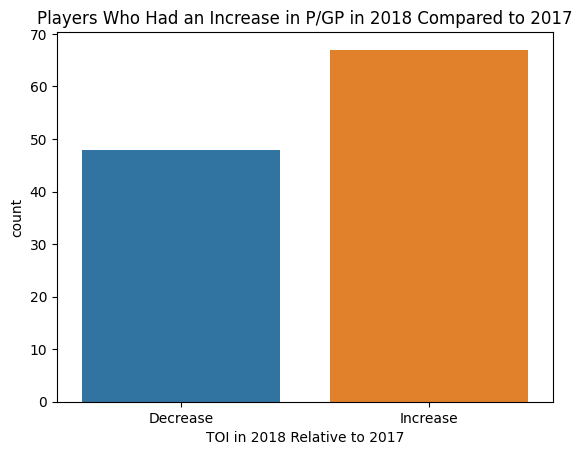

In [354]:
sns.countplot(x=y)
plt.title("Players Who Had an Increase in P/GP in 2018 Compared to 2017")
plt.xlabel("TOI in 2018 Relative to 2017")


From our research questions:

### 1. Does the average change in a top NHL player's offensive stats from one season to the next have a negative correlation with their defensive stats? 
Overall, the top offensive scoring players in the NHL for the 2017 and 2018 seasons did not have much correlation between the change in their offensive and defensive stats in successfive seasons, especially not a negative one like we were questioning. Those whose offensive stats improved if anything saw slight improvement in their defensive stats. Those whose offensive stats declined saw declining defensive stats as well. 
This conclusion is most likelihood due to some bias of us having chosen the top offensively skilled players and we may see different results if we managed to use the statistics of the entirety of the NHL. The most skilled players in the top league, as we can conclude, tend to have much more well rounded games. So whether they are seeing success or failure, it is both offensively and defensively.

### 2. Does an increase in time on ice per game for a succesive season significantly increase an NHL player's overall statistics in that following season?
Our data analysis so far has shown that an increase in TOI in a successive season tends to have a positive relation that increases the P/GP for that successive season as well. Our analysis showed that their was not a lot of correlation between one season's icetime and the stats of the next season. We would have to do a better job with further correlation matrices and plots to actually compare other statistics besides P/GP for those players who had an increase in TOI in successive seasons to determine a stronger conclusion for this question.
But to reiterate, there did seem to be a positive relationship between an increase in TOI and the statistic I was most interested in, the change in P/GP.